# MATH 387 Lab Assignment 2
### Haruki Moriguchi
### March 2, 2018
---

### Question 2
We create $matrix\_uniform(n)$ and $matrix\_normal(n)$, which output an $n \times n$ matrix whose entries are random numbers with a uniform distribution in $\left[-1, 1\right]$ and a normal distribution with parametrs $(\mu=0, \sigma=1)$

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def matrix_uniform(n):
    m = np.empty([n, n], dtype=float)
    for i in range(n):
        r = np.array([], dtype=float)
        for j in range(n):
            r = np.append(r, random.uniform(-1, 1))
        m[i] = r
    return m

def matrix_normal(n):
    m = np.empty([n, n], dtype=float)
    for i in range(n):
        r = np.array([], dtype=float)
        for j in range(n):
            r = np.append(r, random.gauss(0, 1))
        m[i] = r
    return m

---
### Question 3
We implement $GEPP(m)$, which returns a new, reduced matrix as a result of performing Gaussian elimination with partial pivoting. We use numpy arrays for simplified notation and faster computation.

In [3]:
def GEPP(m):
    u = np.array(m, copy=True)
    row = len(u)
    for i in range(row - 1):
        max_index = np.argmax([r[i] for r in u[i:]]) + i # find the row with the largest potential pivot candidate
        if i != max_index:
            u[[i, max_index]] = u[[max_index, i]] # switch rows
        for j in range(i + 1, row):
            t = 0 if u[i][i] == 0 else u[j][i]/u[i][i]
            r = u[i]*t # multiply the row of the pivot by the constant
            u[j] -= r # element-wise subtraction
            u[j][i] = 0 # set it to 0 so we don't get arbitrarily small values
    return u

Now we run our algorithm on some sample matrices to ensure its correctness:

In [95]:
'''
expected output (in fractions):
[[7,   8,    9], 
 [0, 6/7, 12/7], 
 [0,   0.    0]]
'''
print GEPP(np.array(np.mat('1 2 3; 4 5 6; 7 8 9'), dtype=float))
print '---------------------------------------------------------'

'''
expected output (in fractions):
[[128, 256, 512], 
 [0,     0,   0], 
 [0,     0,   0]]
'''
print GEPP(np.array(np.mat('2 4 8; 16 32 64; 128, 256, 512'), dtype=float))
print '---------------------------------------------------------'

'''
expected output (in fractions):
[[5,    6,    6], 
 [0, 28/5, 33/5], 
 [0,    0,  5/2]]
'''
print GEPP(np.array(np.mat('2 8 9; 1 4 7; 5 6 6'), dtype=float))

[[7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [0.00000000e+00 8.57142857e-01 1.71428571e+00]
 [0.00000000e+00 0.00000000e+00 1.11022302e-16]]
---------------------------------------------------------
[[128. 256. 512.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
---------------------------------------------------------
[[5.  6.  6. ]
 [0.  5.6 6.6]
 [0.  0.  2.5]]


---
### Question 4 for Uniformly Distributed Random Matrices

In [4]:
def growth_factor(n):
    return np.amax(abs(GEPP(n)))/np.amax(abs(n))

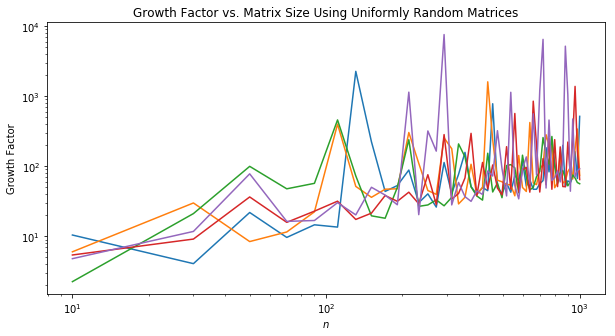

In [96]:
def growth_factors_uniform(nlist):
    return [growth_factor(matrix_uniform(n)) for n in nlist]

nlist = [int(n) for n in np.linspace(10, 1000, 50)]
k = 5

plt.figure(figsize=(10,5))
for _ in range(k):
    plt.plot(nlist, growth_factors_uniform(nlist))

plt.xscale('log')
plt.yscale('log')
plt.title(r'Growth Factor vs. Matrix Size Using Uniformly Random Matrices')
plt.xlabel(r'$n$')
plt.ylabel('Growth Factor')
plt.show()

We plot the growth factor of uniformly distributed random matrices against its size, and we see that the growth factor generally increases as the size increases. It is also apparent that the risk of generating a unstable matrix is higher as the size increases, as the number of spikes (and the peak of the spikes) increases as $n$ increases.

Now we estimate $\alpha$ for $g \approx cn^\alpha$. Since we use logarithmic scales and the growth factor-vs-$n$ graph is roughly a straight line, we can estimate $\alpha$ by estimating the slope of the best-fit line of $\log g \approx \alpha \log n + \log c$. Using the estimated points $(1, 0.5)$ and $(3, 2)$ (taken from the exponents), we get that alpha is roughly $$\alpha \approx \frac{2-0.5}{3-1} = \frac 3 4$$
Comparing with $g \approx 2^n$, $g \approx cn^\alpha$ grows much slower, since if $n = 1000$, the worst case is $g \approx 2^{1000} \approx 1.07*10^{301}$ and the average case is $g \approx 1000^{0.75}c \approx 178c$.

---
### Question 5 for Uniformly Distributed Random Matrices

For each of the following sizes, we generate 1000 matrices and produce a histogram representing the probability density function. We note that there are some matrices whose growth factor is beyond the maximum in the histogram. We discard these matrices, as we are more interested in finding the overall probability density function.

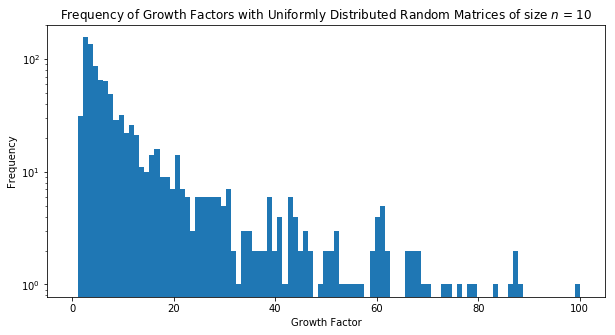

In [6]:
def show_growth_factor_frequency_uniform(n):
    k = 1000
    plt.figure(figsize=(10, 5))
    plt.hist([growth_factor(matrix_uniform(n)) for _ in range(k)], np.linspace(0, 100, 100))
    plt.yscale('log')
    plt.title(r'Frequency of Growth Factors with Uniformly Distributed Random Matrices of size $n$ = %d'%n)
    plt.xlabel(r'Growth Factor')
    plt.ylabel('Frequency')
    plt.show()

show_growth_factor_frequency_uniform(10)

We estimate that the frequency decay is $freq(g) = 201*(-24)^g + 7$, where $freq(g)$ is the frequency of the growth factor $g$.

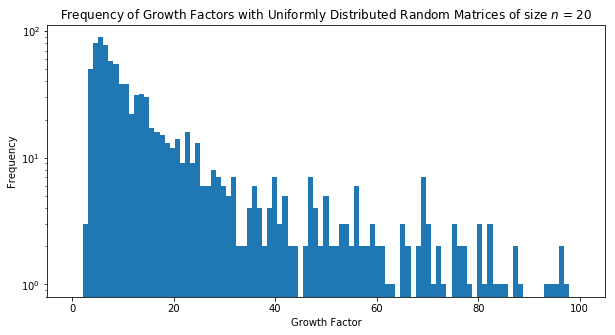

In [7]:
show_growth_factor_frequency_uniform(20)

We estimate that the frequency decay is $freq(g) = 400*(-34)^g + 3$, where $freq(g)$ is the frequency of the growth factor $g$.

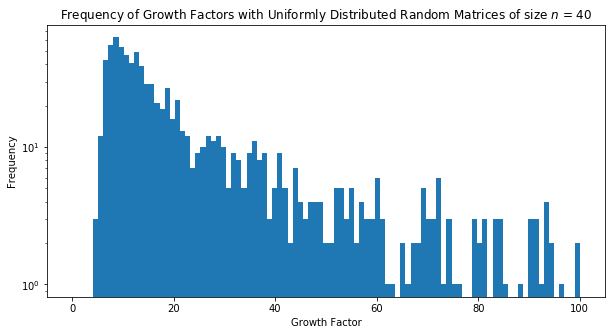

In [8]:
show_growth_factor_frequency_uniform(40)

We estimate that the frequency decay is $freq(g) = 284*(-34)^g + 10$, where $freq(g)$ is the frequency of the growth factor $g$.

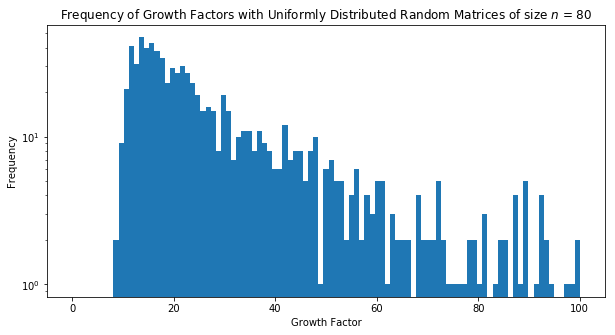

In [9]:
show_growth_factor_frequency_uniform(80)

We estimate that the frequency decay is $freq(g) = 220*(-45)^g + 5$, where $freq(g)$ is the frequency of the growth factor $g$.

---
### Question 4 for Normally Distributed Random Matrices

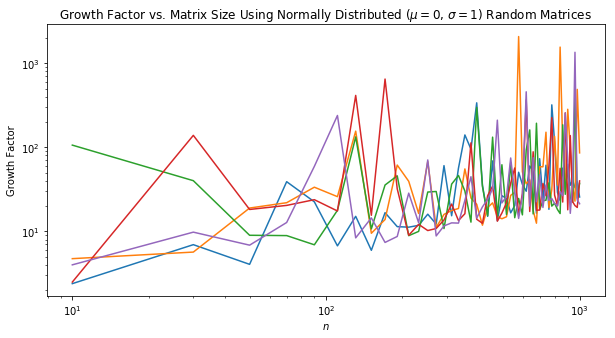

In [97]:
def growth_factors_normal(nlist):
    return [growth_factor(matrix_normal(n)) for n in nlist]

nlist = [int(n) for n in np.linspace(10, 1000, 50)]
k = 5

plt.figure(figsize=(10,5))
for _ in range(k):
    plt.plot(nlist, growth_factors_normal(nlist))

plt.xscale('log')
plt.yscale('log')
plt.title(r'Growth Factor vs. Matrix Size Using Normally Distributed ($\mu=0$, $\sigma=1$) Random Matrices')
plt.xlabel(r'$n$')
plt.ylabel('Growth Factor')
plt.show()

Comparing with the graph for unformly distributed random matrices, the growth factor seems to grow slower with respect to $n$ and we relatively get more stable matrices (lower and less peaks). However for smaller sizes, it seems like there is more chance to generate a unstable matrix than uniform distribution.

We estimate $\alpha$ using a similar method as before, by estimating the slope of the best-fit line of $\log g \approx \alpha \log n + \log c$. Using the estimated points $(1, 0.5)$ and $(3, 1.5)$ (taken from the exponents), we get that alpha is roughly $$\alpha \approx \frac{1.5-0.5}{3-1} = \frac 1 2$$
Comparing with $g \approx 2^n$, $g \approx cn^\alpha$ grows much slower, since if $n = 1000$, the worst case is $g \approx 2^{1000} \approx 1.07*10^{301}$ and the average case is $g \approx 1000^{0.5}c \approx 31.6c$.

---
### Question 5 for Normally Distributed Random Matrices

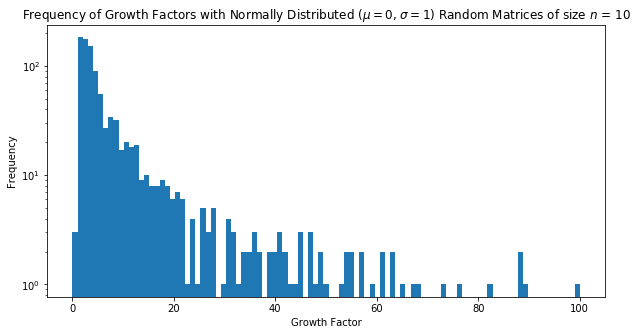

In [10]:
def show_growth_factor_frequency_normal(n):
    k = 1000
    plt.figure(figsize=(10, 5))
    plt.hist([growth_factor(matrix_normal(n)) for _ in range(k)], np.linspace(0, 100, 100))
    plt.yscale('log')
    plt.title(r'Frequency of Growth Factors with Normally Distributed ($\mu=0$, $\sigma=1$) Random Matrices of size $n$ = %d'%n)
    plt.xlabel(r'Growth Factor')
    plt.ylabel('Frequency')
    plt.show()

show_growth_factor_frequency_normal(10)

We estimate that the frequency decay is $freq(g) = 200*(-32)^g + 4$, where $freq(g)$ is the frequency of the growth factor $g$.

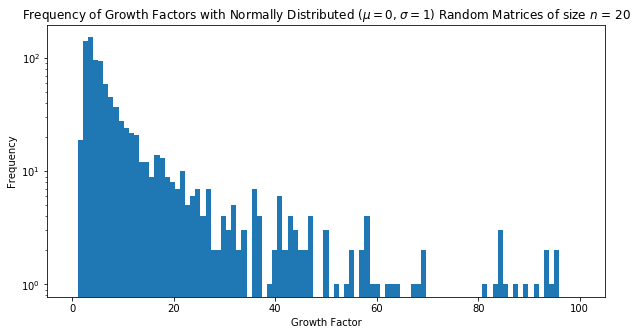

In [11]:
show_growth_factor_frequency_normal(20)

We estimate that the frequency decay is $freq(g) = 144*(-32)^g + 5$ where $freq(g)$ is the frequency of the growth factor $g$.

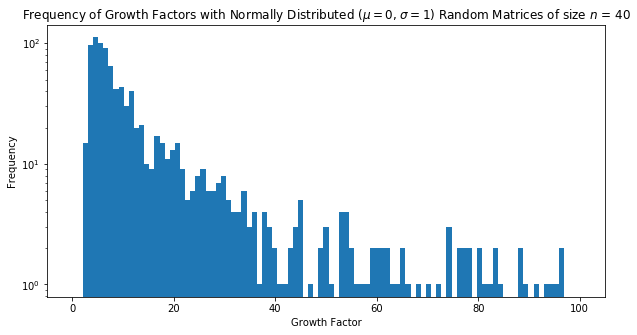

In [12]:
show_growth_factor_frequency_normal(40)

We estimate that the frequency decay is $freq(g) = 188*(-32)^g + 5$, where $freq(g)$ is the frequency of the growth factor $g$.

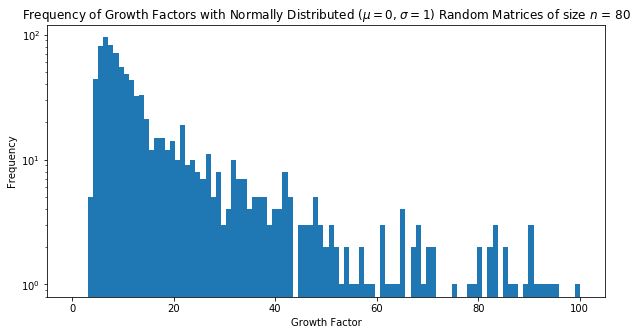

In [13]:
show_growth_factor_frequency_normal(80)

We estimate that the frequency decay is $freq(g) = 435*(-40)^g + 5$, where $freq(g)$ is the frequency of the growth factor $g$.